In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image as img
%matplotlib inline

In [2]:
cat_pic=img.open("cat_Ashleyn.jpg")  #load up a custom image

(895, 592, 3)


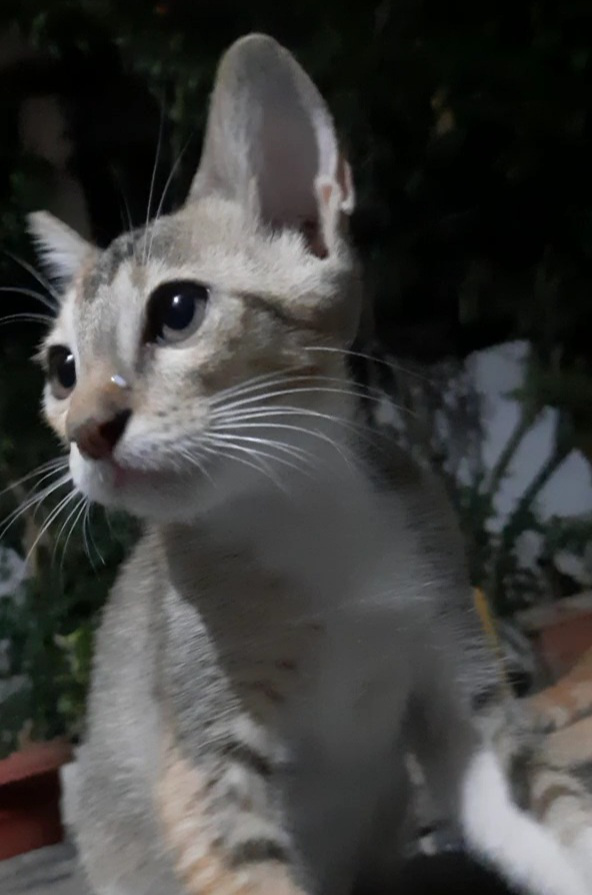

In [3]:
size=np.shape(cat_pic)
print(size)
cat_pic

In [4]:
def compressor(image,n_clusters):
    rows=np.shape(image)[0]
    cols=np.shape(image)[1]
    
    image=np.array(image)
    image=image.reshape(rows*cols,3)
    
    km=KMeans(n_clusters)
    km.fit(image)
    
    cmprs_img = km.cluster_centers_[km.labels_]
    cmprs_img = np.clip(cmprs_img.astype('uint8'), 0, 255)
    cmprs_img = np.array(cmprs_img.reshape(rows, cols, 3))
    cmprs_img=img.fromarray(cmprs_img)
    km=None #dereference Km
    return cmprs_img

In [5]:
comp_2=compressor(cat_pic,2) #2 clusters only in the final image
comp_8=compressor(cat_pic,8) #8 clusters only in the final image
comp_16=compressor(cat_pic,16) #16 clusters
comp_64=compressor(cat_pic,64) #64 clusters
comp_128=compressor(cat_pic,128) #128 clusters

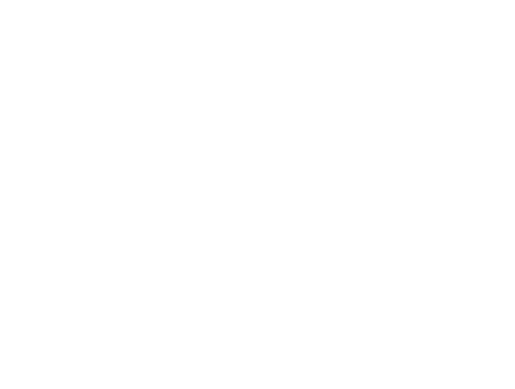

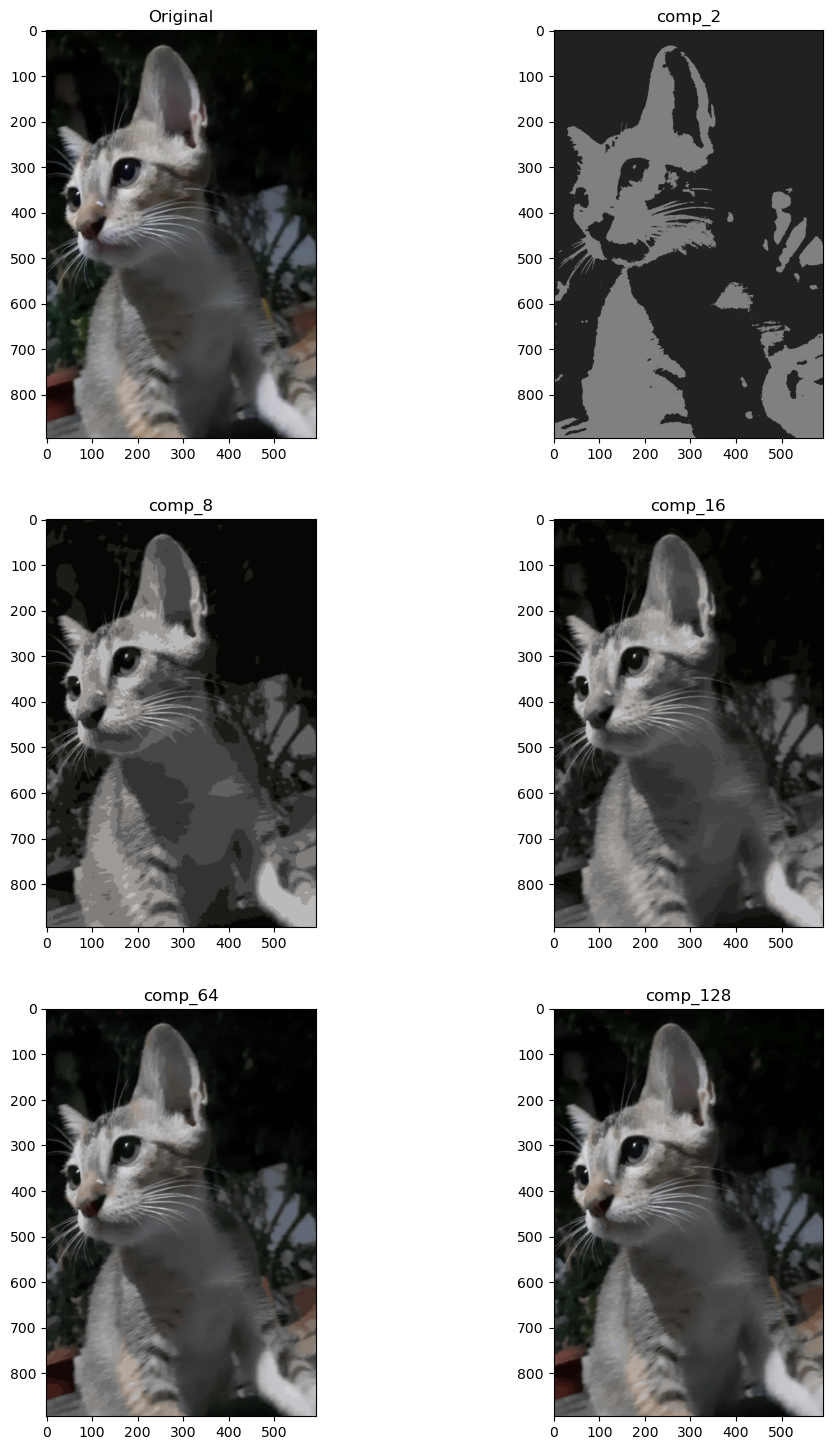

In [6]:
images=[comp_2,comp_8,comp_16,comp_64,comp_128]
imgs=["comp_2","comp_8","comp_16","comp_64","comp_128"]
plt.axis('off')
plt.figure(figsize=(12,18))
plt.subplot(3,2,1)
plt.imshow(cat_pic)
plt.title("Original")

for i,image in enumerate(images):
    plt.subplot(3,2,i+2)
    plt.imshow(image)
    plt.title(imgs[i])

In [7]:
import os
os.mkdir(os.path.join(os.getcwd(),'results'))
os.chdir('results')
os.mkdir(os.path.join(os.getcwd(),'cat'))
os.chdir('cat')

In [8]:
images=[cat_pic,comp_2,comp_8,comp_16,comp_64,comp_128]
imgs=["original","comp_2","comp_8","comp_16","comp_64","comp_128"]
for i,image in enumerate(images):
    image.save(imgs[i]+'.jpg')
os.chdir("../..")

(285, 285, 3)


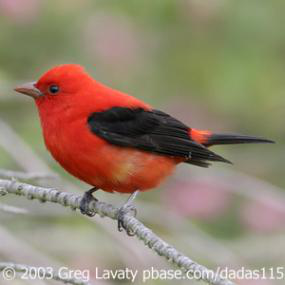

In [9]:
bird=img.open('scarlet_tanager_greg_lavaty_300.jpg')
print(np.shape(bird))
bird

In [10]:
comp_2=compressor(bird,2) #2 clusters only in the final image
comp_8=compressor(bird,8) #8 clusters only in the final image
comp_16=compressor(bird,16) #16 clusters
comp_64=compressor(bird,64) #64 clusters
comp_128=compressor(bird,128) #128 clusters

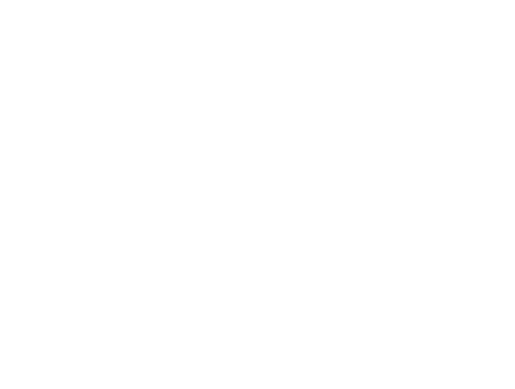

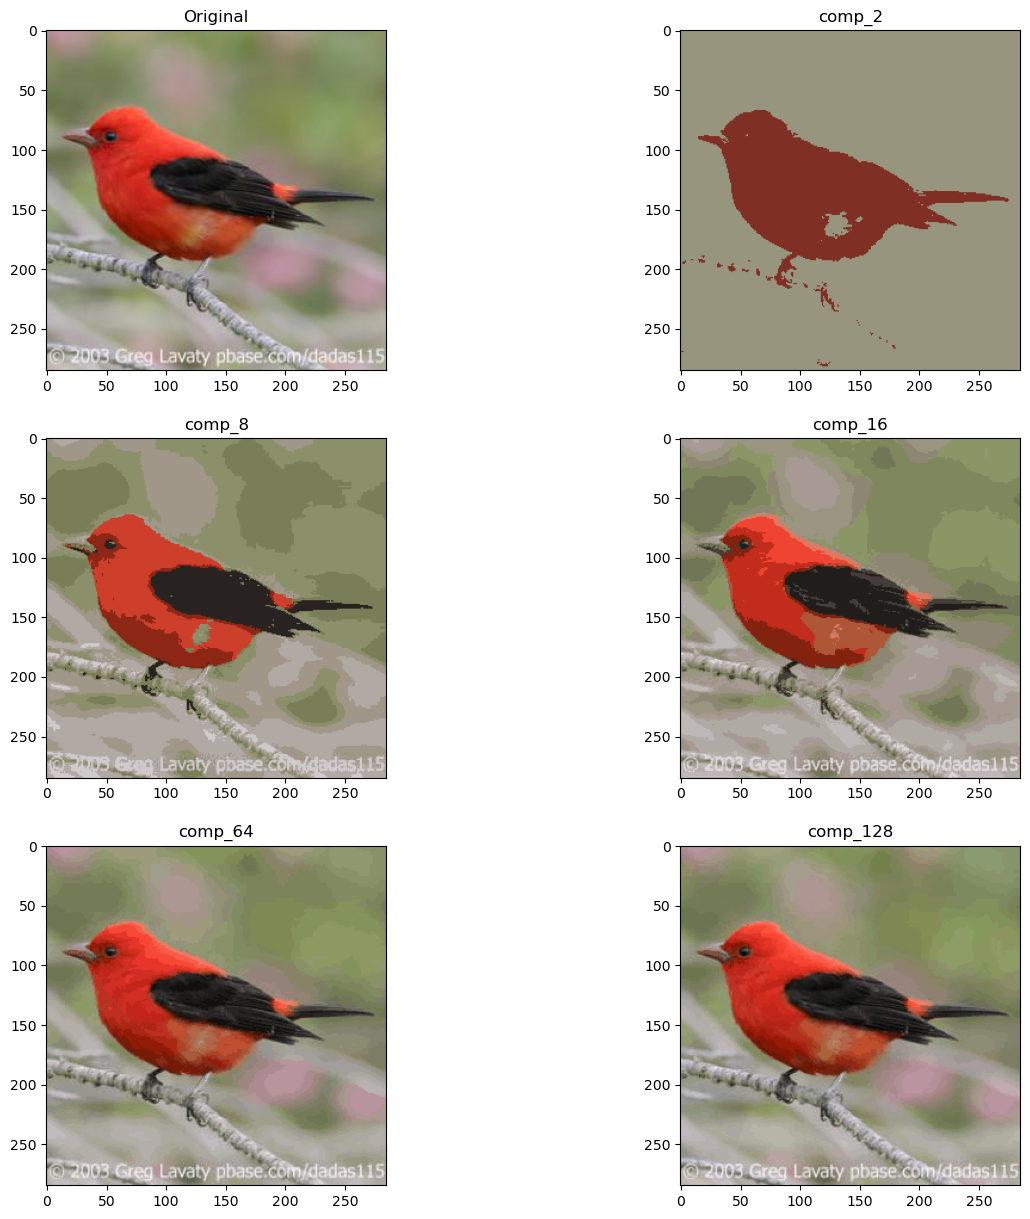

In [11]:
images=[comp_2,comp_8,comp_16,comp_64,comp_128]
imgs=["comp_2","comp_8","comp_16","comp_64","comp_128"]
plt.axis('off')
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.imshow(bird)
plt.title("Original")

for i,image in enumerate(images):
    plt.subplot(3,2,i+2)
    plt.imshow(image)
    plt.title(imgs[i])

In [12]:
os.chdir('results')
os.mkdir(os.path.join(os.getcwd(),'bird'))
os.chdir('bird')

In [13]:
images=[bird,comp_2,comp_8,comp_16,comp_64,comp_128]
imgs=["original","comp_2","comp_8","comp_16","comp_64","comp_128"]
for i,image in enumerate(images):
    image.save(imgs[i]+'.jpg')